## Aviation Safety Risk Analysis: Identifying Low-Risk Aircraft Models

### Overview
This project evaluates civil aviation accident data from the National Transportation Safety Board (NTSB), covering incidents between 1948 and 2022. The purpose is to provide data-driven insights into aircraft safety, focusing on risk levels associated with different aircraft types and operational conditions. The final outcome is a set of actionable recommendations to guide business stakeholders in selecting aircraft models with the lowest risk profiles for potential acquisition and operation.

### Business Understanding
The company intends to expand operations into the aviation industry, with an interest in both commercial and private aircraft. Entering this market involves significant financial and reputational risks, particularly if aircraft selected for acquisition are associated with high accident or fatality rates. The key business need is to identify aircraft models and operational factors that demonstrate the lowest risk. The findings will support informed decision-making for the head of the aviation division, whose objective is to minimize risk exposure while ensuring operational safety and long-term viability.

### Objectives
* Identify aircraft models with the lowest accident and fatality rates.
* Determine the operational or environmental factors (such as weather conditions, phase of flight, or purpose of flight) that most strongly influence accident severity.
* Analyze historical trends to assess whether safety outcomes have improved over time, particularly with newer aircraft or changing regulations.

### 1. Data Loading

In [2]:
# Import Required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [3]:
# Load the Dataset
df = pd. read_csv('./Aviation_Data.csv')
df.head()

c:\Users\Jasho\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Shape of the dataset
df.shape

(90348, 31)

In [5]:
# Column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### 2. Data Understanding

In [7]:
# Dataset Coverage

# Convert Event.Date column to datetime
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")

# Get min and max year from Event.Date
print("Dataset Years:", df["Event.Date"].dt.year.min(), "-", df["Event.Date"].dt.year.max())

Dataset Years: 1948.0 - 2022.0


In [8]:
# Top 10 countries with most recorded events
top_countries = df["Country"].value_counts().head(10)
print("Top 10 Countries by number of events:")
print(top_countries)

Top 10 Countries by number of events:
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Name: Country, dtype: int64


In [9]:
# Aircraft Categories distribution
aircraft_categories = df["Aircraft.Category"].value_counts(dropna=False).head(10)
print("Top Aircraft Categories:")
print(aircraft_categories)

Top Aircraft Categories:
NaN                  58061
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
Name: Aircraft.Category, dtype: int64


In [10]:
# Descriptive Statistics for Numeric Fields
# numeric columns related to injuries and engines
numeric_cols = [
    "Total.Fatal.Injuries", 
    "Total.Serious.Injuries", 
    "Total.Minor.Injuries", 
    "Total.Uninjured", 
    "Number.of.Engines"
]

df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0


In [11]:
# Missing Values: Counts and Percentages
missing = df.isnull().sum().reset_index()
missing.columns = ["Column", "Missing_Count"]
missing["Missing_Percent"] = (missing["Missing_Count"] / len(df)) * 100
missing.sort_values(by="Missing_Percent", ascending=False).head(15)

,Column,Missing_Count,Missing_Percent
20,Schedule,77766,86.073848
22,Air.carrier,73700,81.573471
19,FAR.Description,58325,64.555939
12,Aircraft.Category,58061,64.263736
7,Longitude,55975,61.954886
6,Latitude,55966,61.944924
8,Airport.Code,40099,44.382831
9,Airport.Name,37558,41.570372
28,Broad.phase.of.flight,28624,31.681941
30,Publication.Date,16689,18.471909


In [12]:
# Fields Relevant to Project Objectives
relevant_fields = [
    "Make",              # Aircraft manufacturer
    "Model",             # Aircraft model
    "Injury.Severity",   # Severity classification
    "Weather.Condition", # VMC, IMC, UNK
    "Broad.phase.of.flight", # Phase of flight
    "Purpose.of.flight", # Flight purpose (commercial, personal, etc.)
    "Event.Date",        # To analyze trends over time
    "Country"            # For geographical context
]

print("Relevant fields for analysis:")
print(relevant_fields)

Relevant fields for analysis:
['Make', 'Model', 'Injury.Severity', 'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight', 'Event.Date', 'Country']


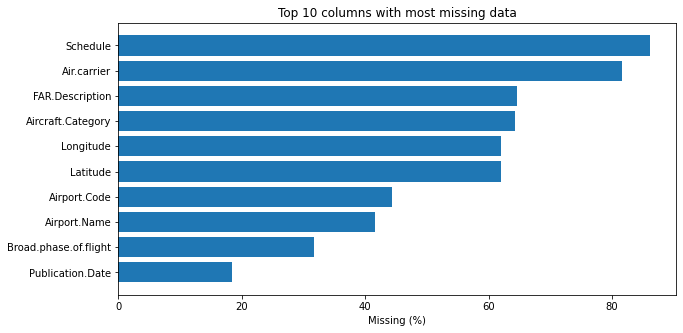

In [13]:
# Top 10 columns by missing %
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(missing_pct.index, missing_pct.values)
plt.xlabel("Missing (%)")
plt.title("Top 10 columns with most missing data")
plt.gca().invert_yaxis();

The chart highlights that several key fields (like Schedule, Air.carrier, FAR Description and Aircraft Category) have very high missing percentages, which limits how deeply they can be used in analysis.

### 3. Data Preparation

In [14]:
# Data Formatting

# Ensure both Event.Date and Publication.Date are datetime
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df["Publication.Date"] = pd.to_datetime(df["Publication.Date"], errors="coerce")

# Create new column for year
df["Event.Year"] = df["Event.Date"].dt.year

print("Event.Date dtypes:", df["Event.Date"].dtype)
print("Publication.Date dtypes:", df["Publication.Date"].dtype)

Event.Date dtypes: datetime64[ns]
Publication.Date dtypes: datetime64[ns]


In [17]:
# Categorical Standardization

# Select categorical columns to standardiza
cat_cols = [
    "Investigation.Type", "Country", "Injury.Severity",
    "Aircraft.damage", "Aircraft.Category", "Make",
    "Model", "Amateur.Built", "Engine.Type",
    "Purpose.of.flight", "Weather.Condition",
    "Broad.phase.of.flight", "Report.Status"
]

# convert to string, strip space and uppercase
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()

df["Injury.Severity"].unique()[:10]

array(['FATAL(2)', 'FATAL(4)', 'FATAL(3)', 'FATAL(1)', 'NON-FATAL',
       'INCIDENT', 'FATAL(8)', 'FATAL(78)', 'FATAL(7)', 'FATAL(6)'],
      dtype=object)

In [19]:
# Missing values

# Replace "NAN"/"NONE"/"UNK" type placeholders with "UNKNOWN"
df["Weather.Condition"] = df["Weather.Condition"].replace({"UNK": "UNKNOWN"})

# fill missing Purpose.of.flight with "UNKNOWN"
df["Purpose.of.flight"] = df["Purpose.of.flight"].fillna("UNKNOWN")

# Fill missing Injury.Serverity with "UNKNOWN"
df["Injury.Severity"] = df["Injury.Severity"].fillna("UNKNOWN")


In [20]:
# Feature Engineering

# Create Serverity Index
# Fatalities = weight 3, Serious = 2, Minor = 1
df["Total.Fatal.Injuries"] = pd.to_numeric(df["Total.Fatal.Injuries"], errors="coerce").fillna(0)
df["Total.Serious.Injuries"] = pd.to_numeric(df["Total.Serious.Injuries"], errors="coerce").fillna(0)
df["Total.Minor.Injuries"] = pd.to_numeric(df["Total.Minor.Injuries"], errors="coerce").fillna(0)

df["Severity.Index"] = (
    df["Total.Fatal.Injuries"] * 3 +
    df["Total.Serious.Injuries"] * 2 +
    df["Total.Minor.Injuries"] * 1
)

# Categorize flights: Commercial vs personal
df["Flight.Category"] = np.where(
    df["Purpose.of.flight"].str.contains("COMMERCIAL|AIR TAXI|BUSINESS", case=False, na=False),
    "COMMERCIAL",
    "PERSONAL"
)

print(df[["Severity.Index", "Flight.Category", "Event.Year"]].head())

   Severity.Index Flight.Category  Event.Year
0             6.0        PERSONAL      1948.0
1            12.0        PERSONAL      1962.0
2             9.0        PERSONAL      1974.0
3             6.0        PERSONAL      1977.0
4             7.0        PERSONAL      1979.0
